In [17]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv, find_dotenv

In [18]:
_: bool = load_dotenv(find_dotenv())

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")


In [19]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    evaluated_score:int

In [20]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [21]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [22]:
def blog_evaluator(state:BlogState)->BlogState:
    ## Extracting content
    blog_content=state["content"]
    outline=state["outline"]

    ##Prompt for Evaluation
    prompt=f'Suppose you are an Evaluator for checking how good the Blog content {blog_content} is generated based on the outline {outline}.Evaluate and Score out of 10.The output value should be integer and a single value'

    ##model Invoke

    output=model.invoke(prompt).content

    state["evaluated_score"]=output

    return state

    




In [23]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node("blog_evaluator",blog_evaluator)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge("create_blog","blog_evaluator")
graph.add_edge('blog_evaluator', END)

workflow = graph.compile()


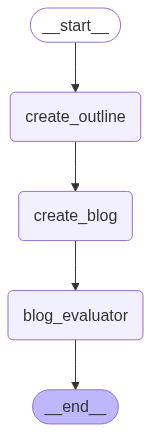

In [28]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [24]:
intial_state = {'title': 'Climate change is Real'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Climate change is Real', 'outline': '## Blog Outline: Climate Change is Real\n\n**I. Introduction (Hook & Thesis)**\n\n   *   **A. Hook:** Start with a compelling statistic, anecdote, or visual description that highlights the impacts of climate change. Examples:\n        *   A striking image of a melting glacier.\n        *   A personal story of someone affected by extreme weather.\n        *   A shocking statistic about rising sea levels.\n   *   **B. Briefly define climate change:** Explain the basic concept of climate change (long-term shifts in temperature and weather patterns). Avoid jargon.\n   *   **C. State the thesis:** Clearly and unequivocally state that climate change is real, human-caused, and a serious threat that requires urgent action.  Example: "Climate change is not a distant threat; it\'s a present reality, driven by human activity, and demanding immediate and comprehensive action to mitigate its devastating consequences."\n   *   **D. Briefly outline the 

In [25]:
print(final_state['outline'])

## Blog Outline: Climate Change is Real

**I. Introduction (Hook & Thesis)**

   *   **A. Hook:** Start with a compelling statistic, anecdote, or visual description that highlights the impacts of climate change. Examples:
        *   A striking image of a melting glacier.
        *   A personal story of someone affected by extreme weather.
        *   A shocking statistic about rising sea levels.
   *   **B. Briefly define climate change:** Explain the basic concept of climate change (long-term shifts in temperature and weather patterns). Avoid jargon.
   *   **C. State the thesis:** Clearly and unequivocally state that climate change is real, human-caused, and a serious threat that requires urgent action.  Example: "Climate change is not a distant threat; it's a present reality, driven by human activity, and demanding immediate and comprehensive action to mitigate its devastating consequences."
   *   **D. Briefly outline the blog's structure:**  Mention the key areas the blog will co

In [26]:
print(final_state['content'])

## Climate Change is Real: Our Planet is Crying Out for Help

**I. Introduction (Hook & Thesis)**

**A. Hook:** Imagine a world where coastal cities are submerged, fertile lands turn to desert, and extreme weather events become the norm. This isn't a scene from a dystopian movie; it's a glimpse into the potential future if we fail to address climate change. The heartbreaking image of a polar bear clinging to a shrinking ice floe serves as a stark reminder of the devastating consequences already unfolding.

**B. Briefly define climate change:** Climate change refers to long-term shifts in temperatures and weather patterns. These shifts can be natural, but since the 1800s, human activities have been the main driver of climate change, primarily due to burning fossil fuels (like coal, oil, and gas) which produces heat-trapping gases.

**C. State the thesis:** Climate change is not a distant threat; it's a present reality, driven by human activity, and demanding immediate and comprehensive 

In [27]:
print(final_state["evaluated_score"])

9
